In [14]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json
import pandas as pd

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '51d71183-412e-42b5-8090-26b4954fa1c3',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2024-10-10T01:40:16.510Z', 'error_code': 0, 'error_message': None, 'elapsed': 27, 'credit_count': 1, 'notice': None, 'total_count': 9855}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 11771, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

In [4]:
type(data)
#pd.set_option('display_columns', None)

dict

In [70]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [32]:
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11771,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.976549e+07,1.976549e+07,False,NaN,1,NaN,NaN,None,2024-10-10T01:38:00.000Z,60704.581678,2.785482e+10,-0.6441,0.444757,-2.774588,-0.661247,6.700232,-0.597978,6.836774,1.199856e+12,56.6522,1.274796e+12,None,2024-10-10T01:38:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-09 21:52:07.487722
1,1027,Ethereum,ETH,ethereum,9393,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.203803e+08,1.203803e+08,True,NaN,2,NaN,NaN,None,2024-10-10T01:37:00.000Z,2386.140230,1.482366e+10,3.1232,0.707176,-3.350407,-0.055854,1.795762,-9.139413,-22.451360,2.872443e+11,13.5625,2.872443e+11,None,2024-10-10T01:37:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-09 21:52:07.487722
2,825,Tether USDt,USDT,tether,99923,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,1.198563e+11,1.213636e+11,True,NaN,3,NaN,NaN,None,2024-10-10T01:37:00.000Z,0.998964,5.177813e+10,-1.8483,0.001176,-0.039938,-0.092064,-0.123870,-0.137856,-0.100142,1.197321e+11,5.6533,1.212379e+11,None,2024-10-10T01:37:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-10-09 21:52:07.487722
3,1839,BNB,BNB,bnb,2257,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.459322e+08,1.459322e+08,False,NaN,4,NaN,NaN,None,2024-10-10T01:37:00.000Z,570.998857,1.872161e+09,-13.9114,0.531400,-1.824605,4.336730,10.590392,8.655697,9.540687,8.332711e+10,3.9368,8.332711e+10,None,2024-10-10T01:37:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-09 21:52:07.487722
4,5426,Solana,SOL,solana,752,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.693739e+08,5.862787e+08,True,NaN,5,NaN,NaN,None,2024-10-10T01:37:00.000Z,139.198649,1.701773e+09,1.6542,0.968895,-4.061648,-1.855380,4.246495,-10.013514,2.540681,6.533621e+10,3.0869,8.160920e+10,None,2024-10-10T01:37:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-09 21:52:07.487722
5,3408,USDC,USDC,usd-coin,22363,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.476681e+10,3.476681e+10,False,NaN,6,NaN,NaN,None,2024-10-10T01:37:00.000Z,1.000036,5.485315e+09,-8.4313,0.020860,0.019379,0.017501,0.009780,-0.001813,0.001844,3.476807e+10,1.6416,3.476807e+10,None,2024-10-10T01:37:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-10-09 21:52:07.487722
6,52,XRP,XRP,xrp,1403,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.664506e+10,9.998714e+10,False,NaN,7,NaN,NaN,None,2024-10-10T01:38:00.000Z,0.525279,8.452049e+08,-8.3837,0.349452,-1.638013,-1.833952,-1.872038,-10.933057,17.398018,2.975449e+10,1.4049,5.252795e+10,None,2024-10-10T01:38:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-09 21:52:07.487722
7,74,Dogecoin,DOGE,dogecoin,1079,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.463021e+11,1.463021e+11,True,NaN,8,NaN,NaN,None,2024-10-10T01:37:00.000Z,0.107869,6.647971e+08,10.5258,0.611008,-0.863824,1.603226,4.987606,0.685867,1.705609,1.578144e+10,0.7454,1.578144e+10,None,2024-10-10T01:37:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-09 21:52:07.487722
8,1958,TRON,TRX,tron,1046,2017-09-13T00:00:00.000Z,"[media, payments, tron-ecosystem, layer-1, dwf...",NaN,8.656583e+10,8.656582e+10,

In [48]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '51d71183-412e-42b5-8090-26b4954fa1c3',
    }
    
    session = Session()
    session.headers.update(headers)
    
    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)

    df2 = pd.json_normalize(data['data'])
    df2['timestamp'] = pd.to_datetime('now')
    df_append = pd.DataFrame(df2)
    df = pd.concat([df,df_append])
    
#NOTE
#jupyter notebook --NotebookApp.iopub_data_rate_limit=1.0e10
#Into the anaconda  prompt to change this to allow to pull this data
#If doesnt work try local host URL

In [50]:
import os
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner Task Ended')
    sleep(60) #sleep for a min
exit()

API Runner Task Ended
API Runner Task Ended


KeyboardInterrupt: 

In [52]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11771,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.976549e+07,1.976549e+07,False,NaN,1,NaN,NaN,None,2024-10-10T01:38:00.000Z,60704.581678,2.785482e+10,-0.6441,0.444757,-2.774588,-0.661247,6.700232,-0.597978,6.836774,1.199856e+12,56.6522,1.274796e+12,None,2024-10-10T01:38:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-09 21:52:07.487722
1,1027,Ethereum,ETH,ethereum,9393,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.203803e+08,1.203803e+08,True,NaN,2,NaN,NaN,None,2024-10-10T01:37:00.000Z,2386.140230,1.482366e+10,3.1232,0.707176,-3.350407,-0.055854,1.795762,-9.139413,-22.451360,2.872443e+11,13.5625,2.872443e+11,None,2024-10-10T01:37:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-09 21:52:07.487722
2,825,Tether USDt,USDT,tether,99923,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,1.198563e+11,1.213636e+11,True,NaN,3,NaN,NaN,None,2024-10-10T01:37:00.000Z,0.998964,5.177813e+10,-1.8483,0.001176,-0.039938,-0.092064,-0.123870,-0.137856,-0.100142,1.197321e+11,5.6533,1.212379e+11,None,2024-10-10T01:37:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-10-09 21:52:07.487722
3,1839,BNB,BNB,bnb,2257,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.459322e+08,1.459322e+08,False,NaN,4,NaN,NaN,None,2024-10-10T01:37:00.000Z,570.998857,1.872161e+09,-13.9114,0.531400,-1.824605,4.336730,10.590392,8.655697,9.540687,8.332711e+10,3.9368,8.332711e+10,None,2024-10-10T01:37:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-09 21:52:07.487722
4,5426,Solana,SOL,solana,752,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.693739e+08,5.862787e+08,True,NaN,5,NaN,NaN,None,2024-10-10T01:37:00.000Z,139.198649,1.701773e+09,1.6542,0.968895,-4.061648,-1.855380,4.246495,-10.013514,2.540681,6.533621e+10,3.0869,8.160920e+10,None,2024-10-10T01:37:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-09 21:52:07.487722
5,3408,USDC,USDC,usd-coin,22363,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.476681e+10,3.476681e+10,False,NaN,6,NaN,NaN,None,2024-10-10T01:37:00.000Z,1.000036,5.485315e+09,-8.4313,0.020860,0.019379,0.017501,0.009780,-0.001813,0.001844,3.476807e+10,1.6416,3.476807e+10,None,2024-10-10T01:37:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-10-09 21:52:07.487722
6,52,XRP,XRP,xrp,1403,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.664506e+10,9.998714e+10,False,NaN,7,NaN,NaN,None,2024-10-10T01:38:00.000Z,0.525279,8.452049e+08,-8.3837,0.349452,-1.638013,-1.833952,-1.872038,-10.933057,17.398018,2.975449e+10,1.4049,5.252795e+10,None,2024-10-10T01:38:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-09 21:52:07.487722
7,74,Dogecoin,DOGE,dogecoin,1079,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.463021e+11,1.463021e+11,True,NaN,8,NaN,NaN,None,2024-10-10T01:37:00.000Z,0.107869,6.647971e+08,10.5258,0.611008,-0.863824,1.603226,4.987606,0.685867,1.705609,1.578144e+10,0.7454,1.578144e+10,None,2024-10-10T01:37:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-09 21:52:07.487722
8,1958,TRON,TRX,tron,1046,2017-09-13T00:00:00.000Z,"[media, payments, tron-ecosystem, layer-1, dwf...",NaN,8.656583e+10,8.656582e+10,

In [56]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [58]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11771,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19765490.00000,19765490.00000,False,NaN,1,NaN,NaN,None,2024-10-10T01:38:00.000Z,60704.58168,27854819045.19107,-0.64410,0.44476,-2.77459,-0.66125,6.70023,-0.59798,6.83677,1199855802115.18652,56.65220,1274796215242.77002,None,2024-10-10T01:38:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-09 21:52:07.487722
1,1027,Ethereum,ETH,ethereum,9393,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120380316.64078,120380316.64078,True,NaN,2,NaN,NaN,None,2024-10-10T01:37:00.000Z,2386.14023,14823659481.88279,3.12320,0.70718,-3.35041,-0.05585,1.79576,-9.13941,-22.45136,287244316452.79816,13.56250,287244316452.79999,None,2024-10-10T01:37:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-09 21:52:07.487722
2,825,Tether USDt,USDT,tether,99923,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,119856254817.54388,121363587342.95561,True,NaN,3,NaN,NaN,None,2024-10-10T01:37:00.000Z,0.99896,51778127238.07840,-1.84830,0.00118,-0.03994,-0.09206,-0.12387,-0.13786,-0.10014,119732104048.11227,5.65330,121237875232.46001,None,2024-10-10T01:37:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-10-09 21:52:07.487722
3,1839,BNB,BNB,bnb,2257,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,145932183.27744,145932183.27744,False,NaN,4,NaN,NaN,None,2024-10-10T01:37:00.000Z,570.99886,1872160697.52071,-13.91140,0.53140,-1.82460,4.33673,10.59039,8.65570,9.54069,83327109857.01633,3.93680,83327109857.02000,None,2024-10-10T01:37:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-09 21:52:07.487722
4,5426,Solana,SOL,solana,752,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,469373897.36427,586278686.98482,True,NaN,5,NaN,NaN,None,2024-10-10T01:37:00.000Z,139.19865,1701773397.76697,1.65420,0.96890,-4.06165,-1.85538,4.24649,-10.01351,2.54068,65336212354.29591,3.08690,81609201122.47000,None,2024-10-10T01:37:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-09 21:52:07.487722
5,3408,USDC,USDC,usd-coin,22363,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,34766813752.33732,34766813752.33732,False,NaN,6,NaN,NaN,None,2024-10-10T01:37:00.000Z,1.00004,5485315415.58844,-8.43130,0.02086,0.01938,0.01750,0.00978,-0.00181,0.00184,34768066137.29584,1.64160,34768066137.30000,None,2024-10-10T01:37:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-10-09 21:52:07.487722
6,52,XRP,XRP,xrp,1403,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,56645058199.00000,99987139355.00000,False,NaN,7,NaN,NaN,None,2024-10-10T01:38:00.000Z,0.52528,845204880.10174,-8.38370,0.34945,-1.63801,-1.83395,-1.87204,-10.93306,17.39802,29754485896.60094,1.40490,52527946554.61000,None,2024-10-10T01:38:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-09 21:52:07.487722
7,74,Dogecoin,DOGE,dogecoin,1079,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,146302136383.70523,146302136383.70523,True,NaN,8,NaN,NaN,None,2024-10-10T01:37:00.000Z,0.10787,664797110.07975,10.52580,0.61101,-0.86382,1.60323,4.98761,0.68587,1.70561,15781444323.79978,0.74540,15781444323.80000,None,2024-10-10T01:37:00.000Z,NaN,NaN,NaN,NaN,N

In [60]:
df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.18900,-2.37575,-0.59768,7.07037,-0.58836,6.42643
Ethereum,0.11830,-2.47588,0.09621,1.97272,-9.22821,-22.76678
Tether USDt,0.01304,-0.04335,-0.08770,-0.12167,-0.12865,-0.10454
BNB,0.13560,-1.10977,4.27520,10.49899,7.70985,9.01306
Solana,0.33486,-3.36174,-1.72136,4.48098,-10.13885,2.00274
USDC,0.00444,0.00384,0.00182,-0.00365,-0.00827,-0.00407
XRP,0.21105,-1.10646,-1.97447,-1.54102,-10.96208,16.83375
Dogecoin,0.21900,-0.79927,1.56287,4.83876,-0.99533,0.93614
TRON,0.01590,-0.10363,3.39577,3.64576,23.59088,18.44759


In [62]:
df4 = df3.stack()
df4

name                                      
Bitcoin       quote.USD.percent_change_1h     0.18900
              quote.USD.percent_change_24h   -2.37575
              quote.USD.percent_change_7d    -0.59768
              quote.USD.percent_change_30d    7.07037
              quote.USD.percent_change_60d   -0.58836
                                               ...   
Bitcoin Cash  quote.USD.percent_change_24h   -2.07276
              quote.USD.percent_change_7d     0.93536
              quote.USD.percent_change_30d    0.53384
              quote.USD.percent_change_60d   -9.45962
              quote.USD.percent_change_90d   -7.72141
Length: 90, dtype: float64

In [64]:
type(df4)

pandas.core.series.Series

In [72]:
df5 = df4.to_frame(name='values')
df5

values
name                                               
Bitcoin      quote.USD.percent_change_1h    0.18900
             quote.USD.percent_change_24h  -2.37575
             quote.USD.percent_change_7d   -0.59768
             quote.USD.percent_change_30d   7.07037
             quote.USD.percent_change_60d  -0.58836
             quote.USD.percent_change_90d   6.42643
Ethereum     quote.USD.percent_change_1h    0.11830
             quote.USD.percent_change_24h  -2.47588
             quote.USD.percent_change_7d    0.09621
             quote.USD.percent_change_30d   1.97272
             quote.USD.percent_change_60d  -9.22821
             quote.USD.percent_change_90d -22.76678
Tether USDt  quote.USD.percent_change_1h    0.01304
             quote.USD.percent_change_24h  -0.04335
             quote.USD.percent_change_7d   -0.08770
             quote.USD.percent_change_30d  -0.12167
             quote.USD.percent_change_60d  -0.12865
             quote.USD.percent_change_90d  -0.10454
BNB          quote.USD.percent_change_1h    0.13560
             quote.USD.percent_change_24h  -1.10977
             quote.USD.percent_change_7d    4.27520
             quote.USD.percent_change_30d  10.49899
             quote.USD.percent_change_60d   7.70985
             quote.USD.percent_change_90d   9.01306
Solana       quote.USD.percent_change_1h    0.33486
             quote.USD.percent_change_24h  -3.36174
             quote.USD.percent_change_7d   -1.72136
             quote.USD.percent_change_30d   4.48098
             quote.USD.percent_change_60d -10.13885
             quote.USD.percent_change_90d   2.00274
USDC         quote.USD.percent_change_1h    0.00444
             quote.USD.percent_change_24h   0.00384
             quote.USD.percent_change_7d    0.00182
             quote.USD.percent_change_30d  -0.00365
             quote.USD.percent_change_60d  -0.00827
             quote.USD.percent_change_90d  -0.00407
XRP          quote.USD.percent_change_1h    0.21105
             quote.USD.percent_change_24h  -1.10646
             quote.USD.percent_change_7d   -1.97447
             quote.USD.percent_change_30d  -1.54102
             quote.USD.percent_change_60d -10.96208
             quote.USD.percent_change_90d  16.83375
Dogecoin     quote.USD.percent_change_1h    0.21900
             quote.USD.percent_change_24h  -0.79927
             quote.USD.percent_change_7d    1.56287
             quote.USD.percent_change_30d   4.83876
             quote.USD.percent_change_60d  -0.99533
             quote.USD.percent_change_90d   0.93614
TRON         quote.USD.percent_change_1h    0.01590
             quote.USD.percent_change_24h  -0.10363
             quote.USD.percent_change_7d    3.39577
             quote.USD.percent_change_30d   3.64576
             quote.USD.percent_change_60d  23.59088
             quote.USD.percent_change_90d  18.44759
Toncoin      quote.USD.percent_change_1h    0.27032
             quote.USD.percent_change_24h  -2.60300
             quote.USD.percent_change_7d   -3.00259
             quote.USD.percent_change_30d  -2.73537
             quote.USD.percent_change_60d -23.91788
             quote.USD.percent_change_90d -30.66709
Cardano      quote.USD.percent_change_1h    0.31972
             quote.USD.percent_change_24h  -1.47474
             quote.USD.percent_change_7d   -1.99025
             quote.USD.percent_change_30d   0.21958
             quote.USD.percent_change_60d  -2.24527
             quote.USD.percent_change_90d -15.03735
Avalanche    quote.USD.percent_change_1h    0.31814
             quote.USD.percent_change_24h  -1.94692
             quote.USD.percent_change_7d    1.77253
             quote.USD.percent_change_30d   9.22232
             quote.USD.percent_change_60d  19.20680
             quote.USD.percent_change_90d   1.81384
Shiba Inu    quote.USD.percent_change_1h    0.57264
             quote.USD.percent_change_24h  -2.08210
             quote.USD.percent_change_7d    3.34951
             quote.USD.percent_change_30d

In [ ]:
df5.count()

In [84]:
index = pd.Index(range(90))

df6 = df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.18900
1,Bitcoin,quote.USD.percent_change_24h,-2.37575
2,Bitcoin,quote.USD.percent_change_7d,-0.59768
3,Bitcoin,quote.USD.percent_change_30d,7.07037
4,Bitcoin,quote.USD.percent_change_60d,-0.58836
5,Bitcoin,quote.USD.percent_change_90d,6.42643
6,Ethereum,quote.USD.percent_change_1h,0.11830
7,Ethereum,quote.USD.percent_change_24h,-2.47588
8,Ethereum,quote.USD.percent_change_7d,0.09621
9,Ethereum,quote.USD.percent_change_30d,1.97272


In [102]:
df7 = df6.rename(columns={'level_1': 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.18900
1,Bitcoin,quote.USD.percent_change_24h,-2.37575
2,Bitcoin,quote.USD.percent_change_7d,-0.59768
3,Bitcoin,quote.USD.percent_change_30d,7.07037
4,Bitcoin,quote.USD.percent_change_60d,-0.58836
5,Bitcoin,quote.USD.percent_change_90d,6.42643
6,Ethereum,quote.USD.percent_change_1h,0.11830
7,Ethereum,quote.USD.percent_change_24h,-2.47588
8,Ethereum,quote.USD.percent_change_7d,0.09621
9,Ethereum,quote.USD.percent_change_30d,1.97272


In [110]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])
df7

,name,percent_change,values
0,Bitcoin,1h,0.18900
1,Bitcoin,24h,-2.37575
2,Bitcoin,7d,-0.59768
3,Bitcoin,30d,7.07037
4,Bitcoin,60d,-0.58836
5,Bitcoin,90d,6.42643
6,Ethereum,1h,0.11830
7,Ethereum,24h,-2.47588
8,Ethereum,7d,0.09621
9,Ethereum,30d,1.97272


In [94]:
import seaborn as sns
import matplotlib.pyplot as plt

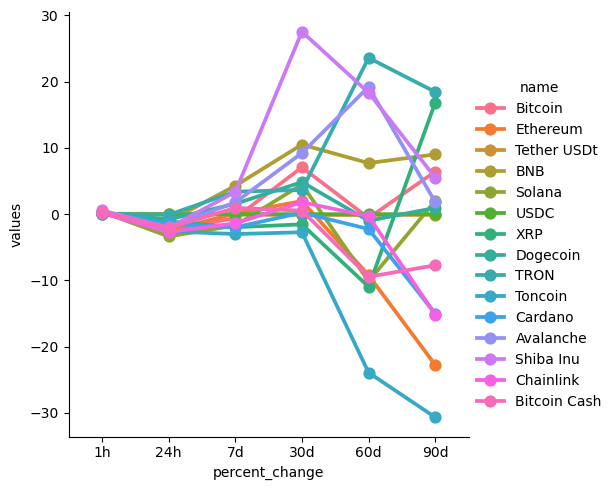

In [112]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')

In [118]:
df10 = df[['name','quote.USD.price','timestamp']]
df10 = df10.query("name =='Bitcoin'")
df10

,name,quote.USD.price,timestamp
0,Bitcoin,60704.58168,2024-10-09 21:52:07.487722
0,Bitcoin,60777.20215,2024-10-09 22:11:19.198799
0,Bitcoin,60777.20215,2024-10-09 22:12:19.400363


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

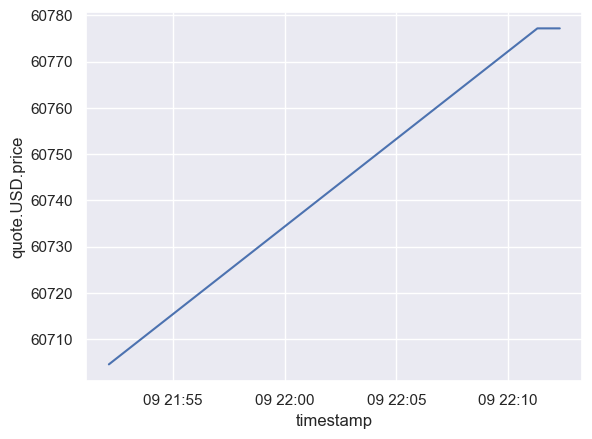

In [124]:
sns.set_theme(style='darkgrid')
sns.lineplot(x='timestamp', y='quote.USD.price', data= df10)